In [112]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np

f_tab_adni_tau = './data/ADNI_Tau_Amyloid_SUVR_amyloid_tau_status_dems.csv'
f_tab_pet_data = './data/Tabular_Info_PET.csv'

df_adni_tau = pd.read_csv(f_tab_adni_tau, low_memory=False)
df_pet_data = pd.read_csv(f_tab_pet_data, low_memory=False)

### ADNI_Tau_Amyloid_SUVR_amyloid_tau_status_dems

##### change the strings in the session column 'ses' to datetime objects to facilitate computing the time differences

In [119]:
df_adni_tau['ses'] = df_adni_tau['ses'].apply(lambda x: datetime.strptime(x, 'ses-%Y-%m-%d'))

#### Number of subjects

In [69]:
unique_id_list = df_adni_tau['ID'].unique()
print(f'Lenth of the DataFrame:    {len(df_adni_tau)}')
print(f'Number of unique subjects:    {len(unique_id_list)}')


Lenth of the DataFrame:    2963
Number of unique subjects:    793


In the following we can observe that there are subjects that have a different diagnosis 'DX' 

The subsequent dataframe lists 'DX' for a single patient in chronological order. It stands out that there was a diagnosis "CN" after the patient has been diagnosed as "MCI"

In [152]:
grp_id = df_adni_tau.groupby('ID')
s59 = grp_id.get_group('sub-0059').sort_values(by='ses')[['ID', 'age', 'group', 'pet.modality', 'DX', 'ses']]
s59

,ID,age,group,pet.modality,DX,ses
20,sub-0059,76,CN,pet-AV45,CN,2011-01-03
24,sub-0059,78,CN,pet-AV45,MCI,2012-12-14
22,sub-0059,80,CN,pet-AV45,CN,2015-01-07
23,sub-0059,83,CN,pet-AV1451,MCI,2017-12-12
21,sub-0059,83,CN,pet-AV45,MCI,2017-12-20
19,sub-0059,85,CN,pet-AV45,MCI,2019-12-20


### Plot the frequency of time differences between 2 pet scans from the same person and the same pet modality

In [135]:
time_diff_days = []

grp_id_mod = df_adni_tau.groupby(['ID', 'pet.modality'])
for name, group in grp_id_mod:
    group = group.sort_values(by='ses')[['ID', 'age', 'group', 'pet.modality', 'DX', 'ses']]
    group['delta'] = (group['ses']-group['ses'].shift())
    group['delta'] = group['delta'].apply(lambda x: x.days)
    
    list_td = list(group['delta'])
    list_td = list(filter(lambda x: str(x) != 'nan', list_td))
    time_diff_days += list_td


1394


<AxesSubplot:ylabel='Percent'>

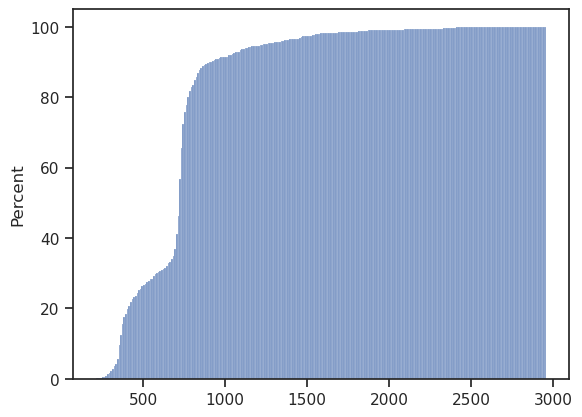

In [150]:
print(len(time_diff_days))
sns.histplot(time_diff_days, stat='percent', cumulative=True,binwidth=10)

## Plot the class distributions over the different modalities 

We can observe that we have a class-imbalance problem since the 'Dementia' class is clearly underrepresented

In [164]:
df_adni_tau['pet.modality'].unique()

array(['pet-AV45', 'pet-AV1451', 'pet-FBB'], dtype=object)

In [165]:
filt_av45 = df_adni_tau['pet.modality'] == 'pet-AV45'
filt_av1451 = df_adni_tau['pet.modality'] == 'pet-AV1451'
filt_fbb = df_adni_tau['pet.modality'] == 'pet-FBB'
df_pet_av45 = df_adni_tau.loc[filt_av45]
df_pet_av1451 = df_adni_tau.loc[filt_av1451]
df_pet_fbb = df_adni_tau.loc[filt_fbb]


<AxesSubplot:xlabel='DX', ylabel='count'>

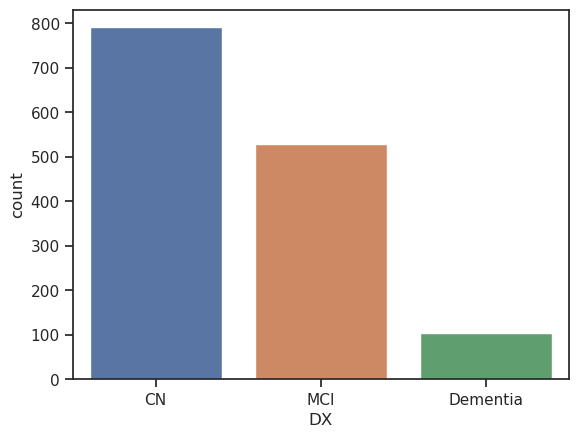

In [162]:
sns.countplot(data=df_pet_av45, x='DX')

<AxesSubplot:xlabel='DX', ylabel='count'>

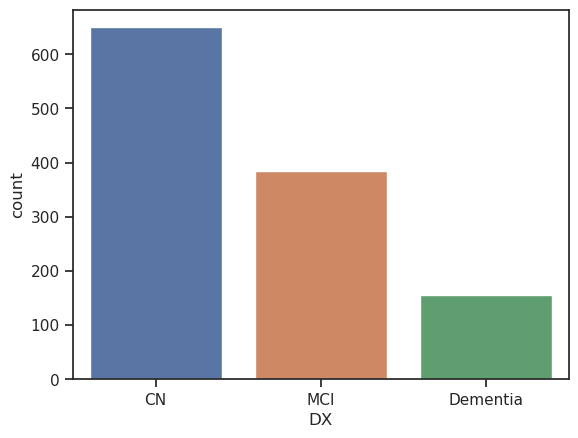

In [166]:
sns.countplot(data=df_pet_av1451, x='DX')

<AxesSubplot:xlabel='DX', ylabel='count'>

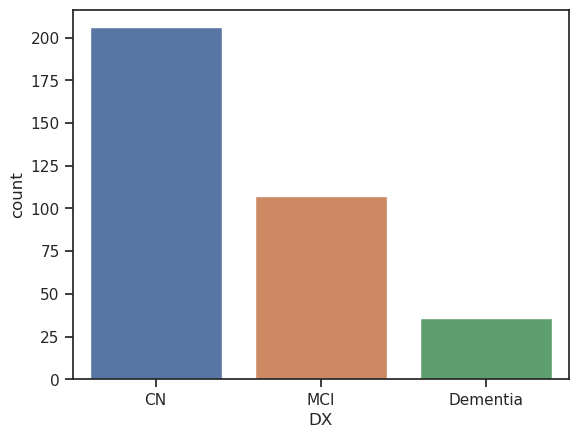

In [167]:
sns.countplot(data=df_pet_fbb, x='DX')

In [3]:
print(print('\n'.join(list(df_adni_tau.keys()))))

ID
age
sex
group
pet.modality
modality.description
image.id
ses
acq.date
SUVR.Schaefer200.ROI.idx.1
SUVR.Schaefer200.ROI.idx.2
SUVR.Schaefer200.ROI.idx.3
SUVR.Schaefer200.ROI.idx.4
SUVR.Schaefer200.ROI.idx.5
SUVR.Schaefer200.ROI.idx.6
SUVR.Schaefer200.ROI.idx.7
SUVR.Schaefer200.ROI.idx.8
SUVR.Schaefer200.ROI.idx.9
SUVR.Schaefer200.ROI.idx.10
SUVR.Schaefer200.ROI.idx.11
SUVR.Schaefer200.ROI.idx.12
SUVR.Schaefer200.ROI.idx.13
SUVR.Schaefer200.ROI.idx.14
SUVR.Schaefer200.ROI.idx.15
SUVR.Schaefer200.ROI.idx.16
SUVR.Schaefer200.ROI.idx.17
SUVR.Schaefer200.ROI.idx.18
SUVR.Schaefer200.ROI.idx.19
SUVR.Schaefer200.ROI.idx.20
SUVR.Schaefer200.ROI.idx.21
SUVR.Schaefer200.ROI.idx.22
SUVR.Schaefer200.ROI.idx.23
SUVR.Schaefer200.ROI.idx.24
SUVR.Schaefer200.ROI.idx.25
SUVR.Schaefer200.ROI.idx.26
SUVR.Schaefer200.ROI.idx.27
SUVR.Schaefer200.ROI.idx.28
SUVR.Schaefer200.ROI.idx.29
SUVR.Schaefer200.ROI.idx.30
SUVR.Schaefer200.ROI.idx.31
SUVR.Schaefer200.ROI.idx.32
SUVR.Schaefer200.ROI.idx.33
SUVR.Schaefe

In [4]:
print(df_adni_tau.head(10))

         ID  age sex group pet.modality  \
0  sub-0021   80   F    CN     pet-AV45   
1  sub-0021   85   F    CN   pet-AV1451   
2  sub-0021   83   F    CN     pet-AV45   
3  sub-0021   78   F    CN     pet-AV45   
4  sub-0021   85   F    CN     pet-AV45   
5  sub-0031   88   F    CN     pet-AV45   
6  sub-0031   90   F    CN     pet-AV45   
7  sub-0031   85   F    CN     pet-AV45   
8  sub-0031   91   F    CN   pet-AV1451   
9  sub-0031   90   F    CN   pet-AV1451   

                                modality.description  image.id  \
0  AV45 Coreg, Avg, Standardized Image and Voxel ...   I338512   
1  AV1451 Coreg, Avg, Standardized Image and Voxe...   I964024   
2  AV45 Coreg, Avg, Standardized Image and Voxel ...   I557331   
3  AV45 Coreg, Avg, Standardized Image and Voxel ...   I196544   
4  AV45 Coreg, Avg, Standardized Image and Voxel ...   I943941   
5  AV45 Coreg, Avg, Standardized Image and Voxel ...   I655253   
6  AV45 Coreg, Avg, Standardized Image and Voxel ...   I989584  

<AxesSubplot:xlabel='age', ylabel='Count'>

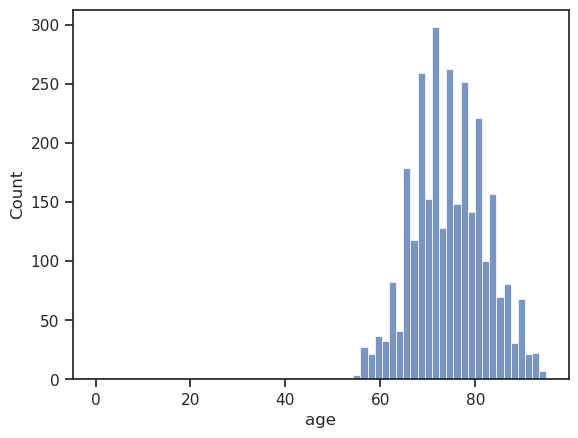

In [148]:
sns.histplot(df_adni_tau, x='age')

<AxesSubplot:xlabel='sex', ylabel='count'>

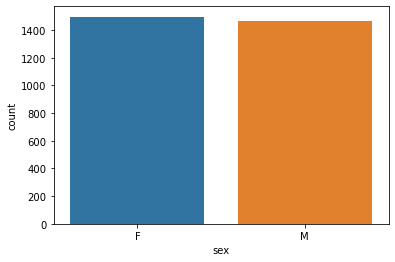

In [6]:
sns.countplot(data=df_adni_tau, x='sex')

<AxesSubplot:xlabel='group', ylabel='count'>

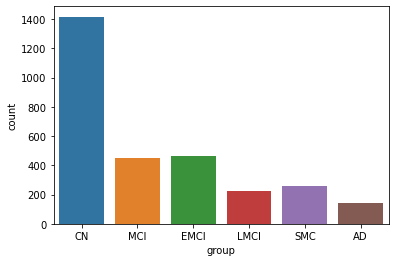

In [7]:
sns.countplot(data=df_adni_tau, x='group')

<AxesSubplot:xlabel='pet.modality', ylabel='count'>

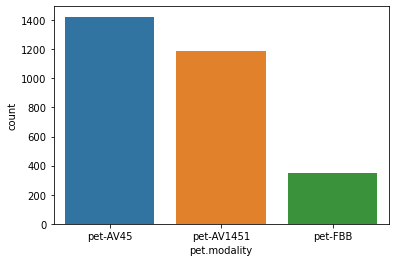

In [8]:
sns.countplot(data=df_adni_tau, x='pet.modality')

<AxesSubplot:xlabel='acq.year', ylabel='Count'>

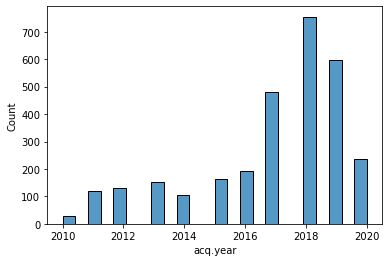

In [9]:
acq_years = pd.to_datetime(df_adni_tau['acq.date']).dt.year
df_adni_tau['acq.year'] = acq_years
sns.histplot(data=df_adni_tau, x='acq.year')

<AxesSubplot:xlabel='MMSE', ylabel='Count'>

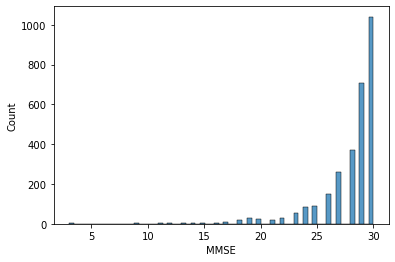

In [10]:
sns.histplot(data=df_adni_tau, x='MMSE')

<AxesSubplot:xlabel='ADAS13', ylabel='Count'>

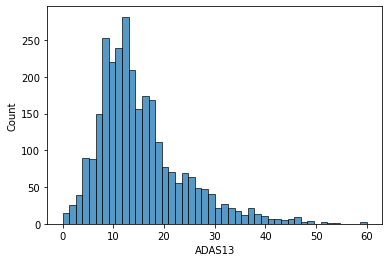

In [11]:
sns.histplot(data=df_adni_tau, x='ADAS13')

<AxesSubplot:xlabel='Phase', ylabel='count'>

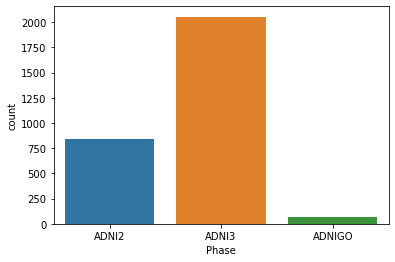

In [13]:
sns.countplot(data=df_adni_tau, x='Phase')

<AxesSubplot:xlabel='apoe', ylabel='count'>

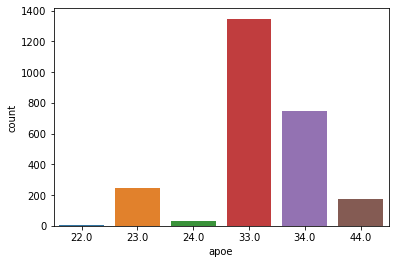

In [17]:
sns.countplot(data=df_adni_tau, x='apoe')

<AxesSubplot:xlabel='centiloid', ylabel='Count'>

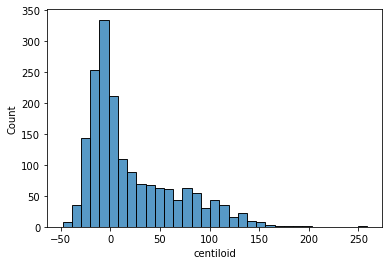

In [18]:
sns.histplot(data=df_adni_tau, x='centiloid')

<AxesSubplot:xlabel='tau.global.SUVR', ylabel='Count'>

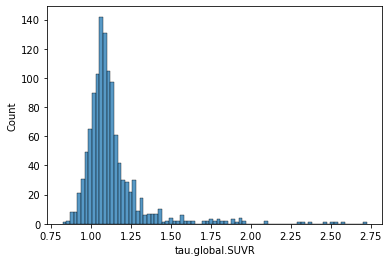

In [19]:
sns.histplot(data=df_adni_tau, x='tau.global.SUVR')

<AxesSubplot:xlabel='mPACCtrailsB', ylabel='Count'>

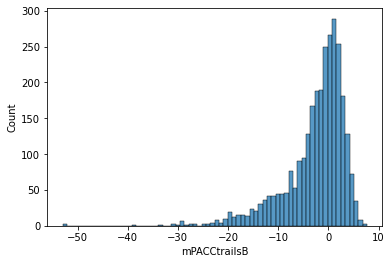

In [21]:
sns.histplot(data=df_adni_tau, x='mPACCtrailsB')

<AxesSubplot:xlabel='SITEID', ylabel='count'>

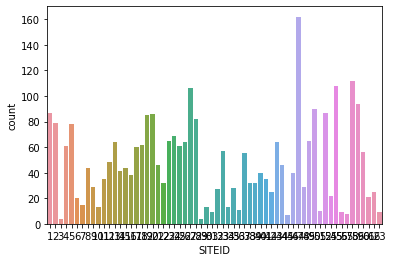

In [24]:
sns.countplot(data=df_adni_tau, x='SITEID')

<AxesSubplot:xlabel='DX', ylabel='count'>

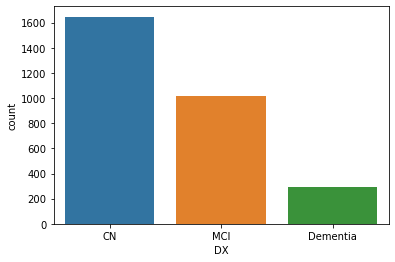

In [25]:
sns.countplot(data=df_adni_tau, x='DX')

<AxesSubplot:xlabel='RID', ylabel='Count'>

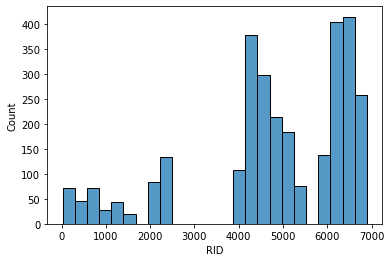

In [28]:
sns.RID(data=df_adni_tau, x='RID')

<AxesSubplot:xlabel='PTEDUCAT', ylabel='Count'>

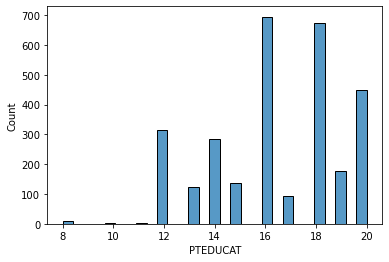

In [41]:
sns.histplot(data=df_adni_tau, x='PTEDUCAT')

<AxesSubplot:xlabel='ADNI_MEM', ylabel='Count'>

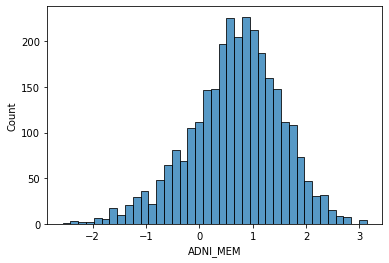

In [42]:
sns.histplot(data=df_adni_tau, x='ADNI_MEM')

<AxesSubplot:xlabel='ADNI_EF', ylabel='Count'>

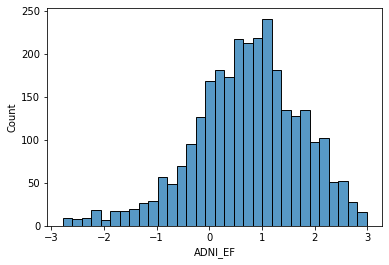

In [43]:
sns.histplot(data=df_adni_tau, x='ADNI_EF')

<AxesSubplot:xlabel='ADNI_LAN', ylabel='Count'>

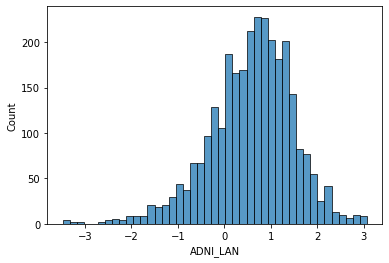

In [44]:
sns.histplot(data=df_adni_tau, x='ADNI_LAN')

<AxesSubplot:xlabel='ADNI_VS', ylabel='Count'>

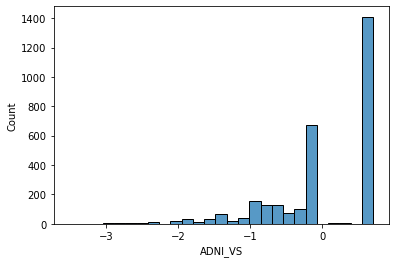

In [45]:
sns.histplot(data=df_adni_tau, x='ADNI_VS')

<AxesSubplot:xlabel='t.diff.uwn.psych.pet.yrs', ylabel='Count'>

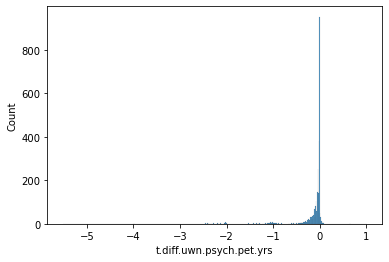

In [46]:
sns.histplot(data=df_adni_tau, x='t.diff.uwn.psych.pet.yrs')

<AxesSubplot:xlabel='t.diff.adas.pet.yrs', ylabel='Count'>

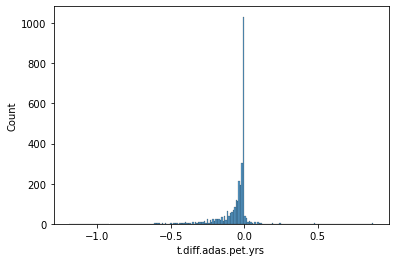

In [47]:
sns.histplot(data=df_adni_tau, x='t.diff.adas.pet.yrs')

<AxesSubplot:xlabel='t.diff.diagnosis.pet.yrs', ylabel='Count'>

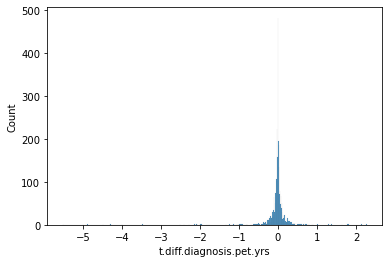

In [48]:
sns.histplot(data=df_adni_tau, x='t.diff.diagnosis.pet.yrs')

### Tabular_Info_PET

In [51]:
print(print('\n'.join(list(df_pet_data.keys()))))

ID
age
sex
pet.modality
ses
apoe
PTEDUCAT
ADNI_MEM
ADNI_EF
ADNI_LAN
ADNI_VS
ADAS13
MMSE
mPACCtrailsB
None


In [52]:
print(df_pet_data.head(10))

         ID  age sex pet.modality             ses  apoe  PTEDUCAT  ADNI_MEM  \
0  sub-0021   85   F     pet-AV45  ses-2017-11-28  23.0        18     1.406   
1  sub-0021   80   F     pet-AV45  ses-2012-10-03  23.0        18     2.217   
2  sub-0021   85   F   pet-AV1451  ses-2018-02-02  23.0        18     1.406   
3  sub-0021   78   F     pet-AV45  ses-2010-10-08  23.0        18     1.692   
4  sub-0021   83   F     pet-AV45  ses-2015-11-05  23.0        18     1.526   
5  sub-0031   90   F   pet-AV1451  ses-2018-04-24  33.0        18     1.294   
6  sub-0031   90   F     pet-AV45  ses-2018-04-18  33.0        18     1.294   
7  sub-0031   83   F     pet-AV45  ses-2010-12-01  33.0        18     1.462   
8  sub-0031   85   F     pet-AV45  ses-2012-09-20  33.0        18     1.649   
9  sub-0031   88   F     pet-AV45  ses-2016-01-26  33.0        18     1.557   

   ADNI_EF  ADNI_LAN  ADNI_VS  ADAS13  MMSE  mPACCtrailsB  
0   -0.493     0.554    0.706     NaN   NaN           NaN  
1    0.565

<AxesSubplot:xlabel='age', ylabel='Count'>

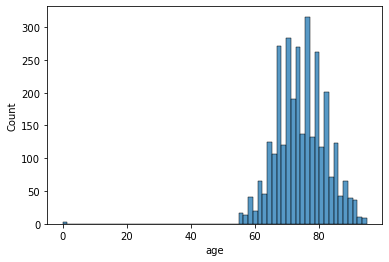

In [53]:
sns.histplot(df_pet_data, x='age')

<AxesSubplot:xlabel='sex', ylabel='count'>

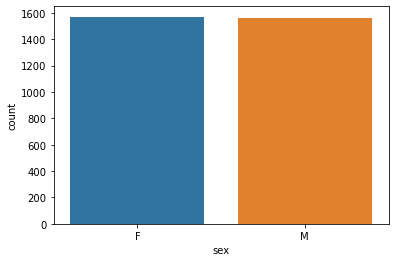

In [57]:
sns.countplot(data=df_pet_data, x='sex')

<AxesSubplot:xlabel='pet.modality', ylabel='count'>

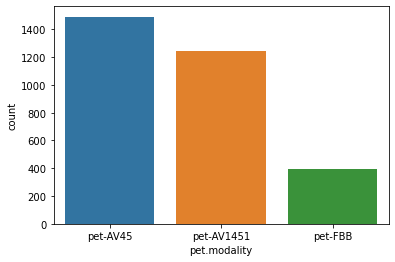

In [58]:
sns.countplot(data=df_pet_data, x='pet.modality')

<AxesSubplot:xlabel='MMSE', ylabel='Count'>

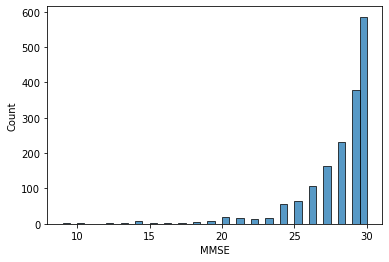

In [59]:
sns.histplot(data=df_pet_data, x='MMSE')